In [52]:
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import warnings
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
warnings.filterwarnings( 'ignore' )

co = Options()
co.add_experimental_option('debuggerAddress', '127.0.0.1:9222')
 


In [18]:
def get_dates():
    temp=[]
    thread_xpath = driver.find_element_by_xpath('//*[@id="container"]/div[2]') 
    thread = thread_xpath.text 
    for x in thread.split("\n"):
        #올해 게시물은 00/00 00:00 이라서 11, 나머지는 00/00/00 00:00 이라서 14
        #가끔 오픈 채팅방 같은 링크 떄문에 그냥 / 만하면 날짜만 크롤링이 안된다.
        if '/' in x and (len(x)==11 or len(x)==14):
            temp.append(x)
    return temp
    

In [16]:
URL = 'https://everytime.kr/search/all/%EC%A1%B1%EB%B3%B4'
# URL = 'https://naver.com'
driver = webdriver.Chrome(executable_path='chromedriver.exe',options=co)
driver.get(url=URL)

In [17]:
#first 첫 페이지
dates=[]
dates+=get_dates()
cnt=1
print("page: {},  dates: {}".format(cnt,len(dates)))

# first next
#처음에는 다음 버튼 밖에 없기 떄문에

click_xpath=driver.find_element_by_xpath('//*[@id="container"]/div[2]/div[2]/a') 
click_xpath.click()
time.sleep(3)
dates+=get_dates()
cnt+=1
print("page: {},  dates: {}".format(cnt,len(dates)))
#second next
#두번째에는 이전, 다음 버튼이 있어서 a[2]

click_xpath=driver.find_element_by_xpath('//*[@id="container"]/div[2]/div[2]/a[2]')
click_xpath.click() 
time.sleep(3)
dates+=get_dates()
cnt+=1
print("page: {},  dates: {}".format(cnt,len(dates)))
#next
#세번째 이후로는 처음,이전, 다음 버튼이 있어서 a[3]
while(1):
    try:
        
        click_xpath=driver.find_element_by_xpath('//*[@id="container"]/div[2]/div[2]/a[3]')
        click_xpath.click() 
        time.sleep(3)
        temp=get_dates()
        if len(temp)!=20:
            print(temp)
        dates+=temp
        cnt+=1
        print("page: {},  dates: {}".format(cnt,len(dates)))
    except:
        break


page: 1,  dates: 18
page: 2,  dates: 38
page: 3,  dates: 58
page: 4,  dates: 78
page: 5,  dates: 98
page: 6,  dates: 118
page: 7,  dates: 138
page: 8,  dates: 158
page: 9,  dates: 178
page: 10,  dates: 198
page: 11,  dates: 218
page: 12,  dates: 238
page: 13,  dates: 258
page: 14,  dates: 278
page: 15,  dates: 298
page: 16,  dates: 318
page: 17,  dates: 338
page: 18,  dates: 358
page: 19,  dates: 378
page: 20,  dates: 398
page: 21,  dates: 418
page: 22,  dates: 438
page: 23,  dates: 458
page: 24,  dates: 478
page: 25,  dates: 498
page: 26,  dates: 518
page: 27,  dates: 538
page: 28,  dates: 558
page: 29,  dates: 578
page: 30,  dates: 598
page: 31,  dates: 618
page: 32,  dates: 638
page: 33,  dates: 658
page: 34,  dates: 678
page: 35,  dates: 698
page: 36,  dates: 718
page: 37,  dates: 738
page: 38,  dates: 758
page: 39,  dates: 778
page: 40,  dates: 798
page: 41,  dates: 818
page: 42,  dates: 838
page: 43,  dates: 858
page: 44,  dates: 878
page: 45,  dates: 898
page: 46,  dates: 918
pa

In [19]:
months_2022=[x[:2] for x in dates if len(x)==11]
months_2021=[x[3:5] for x in dates if x[:2]=='21']
months_2020=[x[3:5] for x in dates if x[:2]=='20']
months_2019=[x[3:5] for x in dates if x[:2]=='19']
months_2018=[x[3:5] for x in dates if x[:2]=='18']
months_2017=[x[3:5] for x in dates if x[:2]=='17']

In [53]:
count_months_2022=Counter(months_2022)
count_months_2021=Counter(months_2021)
count_months_2020=Counter(months_2020)
count_months_2019=Counter(months_2019)
count_months_2018=Counter(months_2018)
count_months_2017=Counter(months_2017)


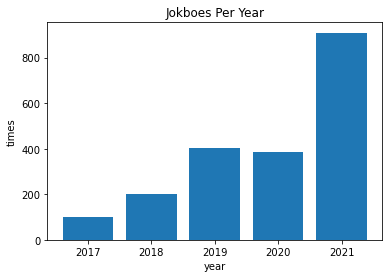

In [130]:
plt.bar([2017,2018,2019,2020,2021],[len(months_2017),len(months_2018),len(months_2019),len(months_2020),len(months_2021)])
plt.xlabel('year')
plt.ylabel('times')
plt.title('Jokboes Per Year')
plt.savefig('Jokboes Per Year.png',facecolor='#eeeeee')
plt.show()


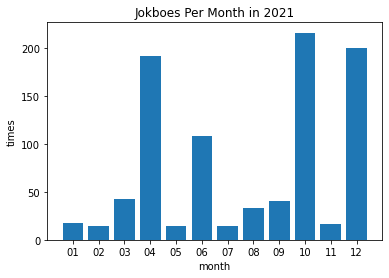

In [131]:

plt.bar(list(reversed(count_months_2021.keys())),list(reversed(count_months_2021.values())))
plt.xlabel('month')
plt.ylabel('times')
plt.title('Jokboes Per Month in 2021')
plt.savefig('Jokboes Per Month in 2021',facecolor='#eeeeee')
plt.show()

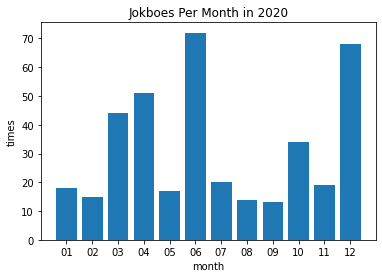

In [132]:

plt.bar(list(reversed(count_months_2020.keys())),list(reversed(count_months_2020.values())))
plt.xlabel('month')
plt.ylabel('times')
plt.title('Jokboes Per Month in 2020')
plt.savefig('Jokboes Per Month in 2020',facecolor='#eeeeee')
plt.show()

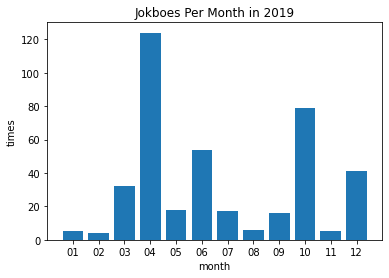

In [133]:

plt.bar(list(reversed(count_months_2019.keys())),list(reversed(count_months_2019.values())))
plt.xlabel('month')
plt.ylabel('times')
plt.title('Jokboes Per Month in 2019')
plt.savefig('Jokboes Per Month in 2019',facecolor='#eeeeee')
plt.show()

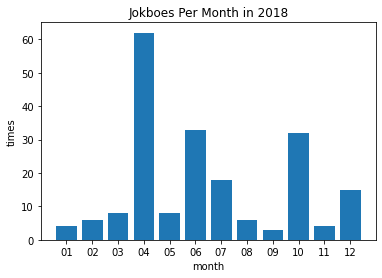

In [134]:

plt.bar(list(reversed(count_months_2018.keys())),list(reversed(count_months_2018.values())))
plt.xlabel('month')
plt.ylabel('times')
plt.title('Jokboes Per Month in 2018')
plt.savefig('Jokboes Per Month in 2018',facecolor='#eeeeee')
plt.show()

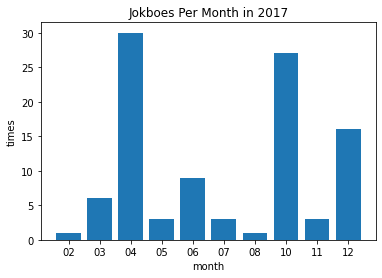

In [135]:

plt.bar(list(reversed(count_months_2017.keys())),list(reversed(count_months_2017.values())))
plt.xlabel('month')
plt.ylabel('times')
plt.title('Jokboes Per Month in 2017')
plt.savefig('Jokboes Per Month in 2017',facecolor='#eeeeee')
plt.show()

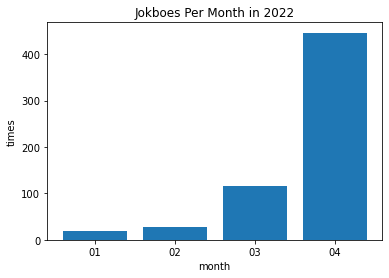

In [136]:
count_months_2022=Counter(months_2022)
plt.bar(list(reversed(count_months_2022.keys())),list(reversed(count_months_2022.values())))
plt.xlabel('month')
plt.ylabel('times')
plt.title('Jokboes Per Month in 2022')
plt.savefig('Jokboes Per Month in 2022',facecolor='#eeeeee')
plt.show()

In [124]:
dataframe=pd.concat([pd.DataFrame(dict(count_months_2022),index = [2022]),
pd.DataFrame(dict(count_months_2021),index = [2021]),
pd.DataFrame(dict(count_months_2020),index = [2020]),
pd.DataFrame(dict(count_months_2019),index = [2019]),
pd.DataFrame(dict(count_months_2018),index = [2018]),
pd.DataFrame(dict(count_months_2017),index = [2017])])


In [125]:
dataframe=dataframe.drop(['12','11','10','09','08','07','06','05'],axis='columns').fillna(0)
dataframe=dataframe.T.sort_index()
dataframe
# dataframe=dataframe.reset_index().drop('index',axis='columns')
# dataframe


,2022,2021,2020,2019,2018,2017
01,19.0,18.0,18.0,5.0,4.0,0.0
02,28.0,14.0,15.0,4.0,6.0,1.0
03,115.0,43.0,44.0,32.0,8.0,6.0
04,446.0,192.0,51.0,124.0,62.0,30.0


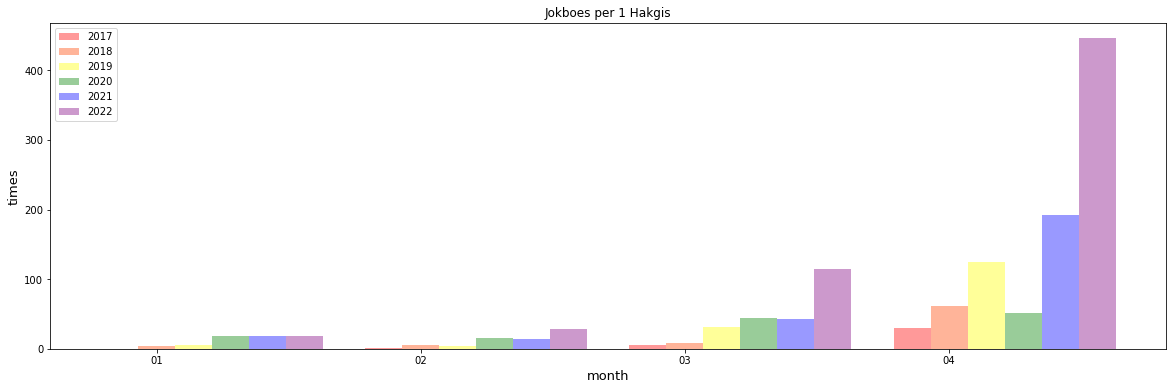

In [137]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,6))
bar_width = 0.14
month = ['01','02', '03', '04']

index = np.arange(4)

# 각 월별로 6개의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, dataframe[2017], bar_width, alpha=0.4, color='red', label='2017')

b2 = plt.bar(index + bar_width, dataframe[2018], bar_width, alpha=0.4, color='orangered', label='2018')

b3 = plt.bar(index + 2 * bar_width, dataframe[2019], bar_width, alpha=0.4, color='yellow', label='2019')

b4 = plt.bar(index + 3 * bar_width, dataframe[2020], bar_width, alpha=0.4, color='green', label='2020')

b5 = plt.bar(index + 4 * bar_width, dataframe[2021], bar_width, alpha=0.4, color='blue', label='2021')

b6 = plt.bar(index + 5 * bar_width, dataframe[2022], bar_width, alpha=0.4, color='purple', label='2022')

# # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), month)

# x축, y축 이름 및 범례 설정
plt.xlabel('month', size = 13)
plt.ylabel('times', size = 13)
plt.title('Jokboes per 1 Hakgis')
plt.savefig('Jokboes per 1 Hakgis',facecolor='#eeeeee')
plt.legend()
plt.show()